In [1]:
!pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("carli_housing.csv")

In [3]:
# Handle missing values (fill with median)
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)

# One-hot encode categorical variable
ohe = OneHotEncoder(drop='first', sparse=False)
categorical_encoded = ohe.fit_transform(data[['ocean_proximity']])
categorical_data = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out(['ocean_proximity']))
data = pd.concat([data.drop(columns=['ocean_proximity']), categorical_data], axis=1)

# Define features and target
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']


/var/folders/cm/97wmhc8j1r70pqq95d0647jm0000gn/T/ipykernel_9340/4293049655.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [4]:
# Handle missing values (fill with median)
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)

/var/folders/cm/97wmhc8j1r70pqq95d0647jm0000gn/T/ipykernel_9340/233173669.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)


In [5]:
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].median())


In [6]:
# One-hot encode categorical variable
ohe = OneHotEncoder(drop='first', sparse=False)
categorical_encoded = ohe.fit_transform(data[['ocean_proximity']])
categorical_data = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out(['ocean_proximity']))
data = pd.concat([data.drop(columns=['ocean_proximity']), categorical_data], axis=1)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [7]:
# One-hot encode categorical variable
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = ohe.fit_transform(data[['ocean_proximity']])
categorical_data = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out(['ocean_proximity']))
data = pd.concat([data.drop(columns=['ocean_proximity']), categorical_data], axis=1)


In [10]:
#  Data is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
numerical_features = X.select_dtypes(include=[np.number]).columns
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)])

# Models
models = {
    "Simple Linear Regression": LinearRegression(),
    "Multiple Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=1.0),
    "Ridge Regression": Ridge(alpha=1.0)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name} MSE: {mse:.2f}")

Simple Linear Regression MSE: 4908476721.16
Multiple Linear Regression MSE: 4908476721.16
Lasso Regression MSE: 4908382747.10
Ridge Regression MSE: 4908041658.45


In [9]:
# Define features and target
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

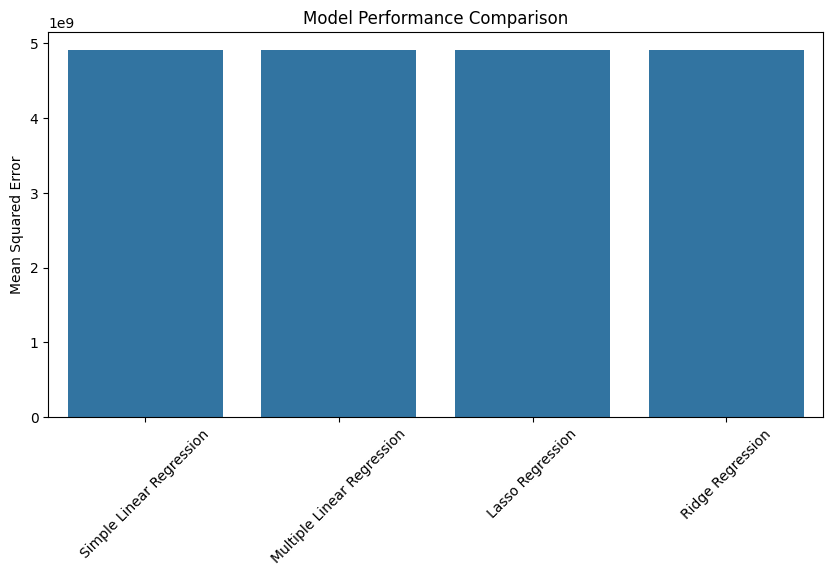

In [11]:
# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.show()



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

Simple Linear Regression MSE: 4908476721.16
Multiple Linear Regression MSE: 4908476721.16
Lasso Regression MSE: 4908382747.10
Ridge Regression MSE: 4908041658.45
Decision Tree MSE: 4855424720.34
Random Forest MSE: 2401861420.45
Support Vector Machine MSE: 13655973504.45


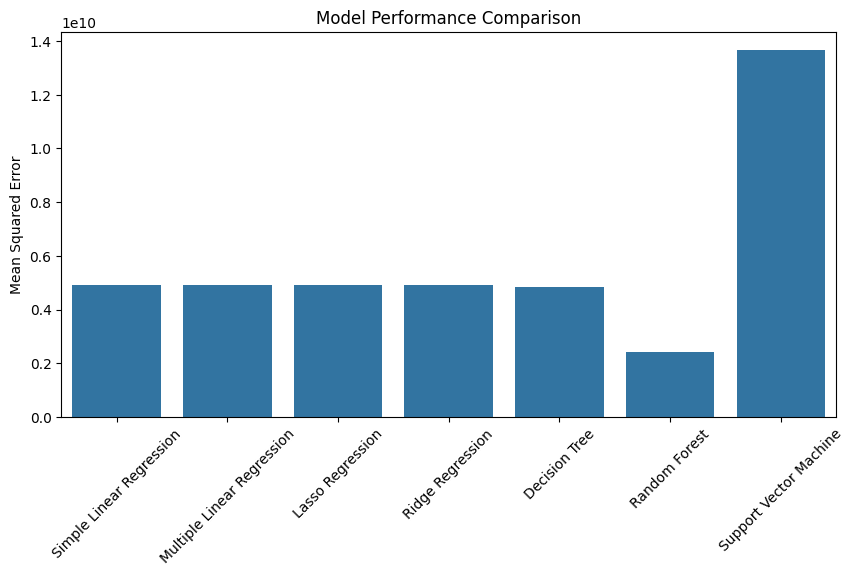

In [13]:
# Models
models = {
    "Simple Linear Regression": LinearRegression(),
    "Multiple Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=1.0),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name} MSE: {mse:.2f}")

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.show()
